In [ ]:
data = pd.read_csv('../csv/dataset3.csv', sep='|')
data = data.rename(columns={'paciente': 'id', 'utm30x_coord': 'x', 'utm30y_coord' : 'y'})
data.to_csv ('../csv/modify.csv', index = False, header=True)
data = pd.read_csv('../csv/modify.csv', sep=',')
data.columns

In [1]:
# -*- coding: utf-8 -*-

# Form implementation generated from reading ui file 'doubleCombo.ui'
#
# Created by: PyQt5 UI code generator 5.15.1
#
# WARNING: Any manual changes made to this file will be lost when pyuic5 is
# run again.  Do not edit this file unless you know what you are doing.

#GUI

import csv
import pandas as pd
import numpy as np
from scipy.stats import entropy
from math import log, e
import itertools
from PyQt5.QtCore import pyqtSignal, QObject
from PyQt5 import QtCore, QtGui, QtWidgets, uic
from PyQt5.QtCore import *
from PyQt5.QtGui import *
from PyQt5.QtWidgets import *
import sys
import matplotlib.pyplot as plt
from pathlib import Path

class pandasModel(QAbstractTableModel):
    def __init__(self, data):
        QAbstractTableModel.__init__(self)
        self._data = data

    def rowCount(self, parent=None):
        return self._data.shape[0]

    def columnCount(self, parnet=None):
        return self._data.shape[1]

    def data(self, index, role=Qt.DisplayRole):
        if index.isValid():
            if role == Qt.DisplayRole:
                return str(self._data.iloc[index.row(), index.column()])
        return None

    def headerData(self, col, orientation, role):
        if orientation == Qt.Horizontal and role == Qt.DisplayRole:
            return self._data.columns[col]
        return None

class Ui_Dialog1(QObject):
    
    submitted = QtCore.pyqtSignal(list,list)

    def setupUi(self, Dialog, lista):
        self.dialog = Dialog
        Dialog.setObjectName("Dialog")
        self.data = lista
        Dialog.resize(400, 50*(len(self.data)+2))
        self.pushButton = QtWidgets.QPushButton(Dialog)
        self.pushButton.setGeometry(QtCore.QRect(300, 50*(len(self.data)+1), 75, 23))
        self.pushButton.setObjectName("pushButton")

        self.label = QtWidgets.QLabel(Dialog)
        self.label.setGeometry(QtCore.QRect(50, 0, 300, 40))
        self.label.setObjectName("label")
        myFont=QtGui.QFont()
        myFont.setBold(True)
        self.label.setFont(myFont)

        self.lista = list(range(len(self.data)))
        self.lista1 = list(range(len(self.data)))
        self.lista2 = list(range(len(self.data)))

        cont = 0
        init = 50
        _translate = QtCore.QCoreApplication.translate
        for i, v in enumerate(self.lista):
            self.lista[i] = QtWidgets.QComboBox(Dialog)
            self.lista[i].setGeometry(QtCore.QRect(50, init*cont+init, 150, 20))
            self.lista[i].setObjectName("comboBox")

            self.lista1[i] = QtWidgets.QComboBox(Dialog)
            self.lista1[i].setGeometry(QtCore.QRect(220, init*cont+init, 100, 20))
            self.lista1[i].setObjectName("comboBox_2")

            self.lista2[i] = QtWidgets.QLabel(Dialog)
            self.lista2[i].setGeometry(QtCore.QRect(50, init*cont+30, 150, 20))
            self.lista2[i].setObjectName("label")
            self.lista2[i].setText(_translate("Dialog", self.data[i]))

            self.addItems(i, _translate)

            cont = cont + 1

        self.retranslateUi(Dialog)
        QtCore.QMetaObject.connectSlotsByName(Dialog)
        self.pushButton.clicked.connect(self.getData)

    def addItems(self,i, tr):
        self.lista[i].addItem("")        
        self.lista[i].setItemText(0, tr("Dialog", "Fechas"))
        self.lista[i].addItem("")
        self.lista[i].setItemText(1, tr("Dialog", "Zona"))
        self.lista[i].addItem("")
        self.lista[i].setItemText(2, tr("Dialog", "Nivel salud"))
        self.lista[i].addItem("")
        self.lista[i].setItemText(3, tr("Dialog", "ID municipio"))
        self.lista[i].addItem("")
        self.lista[i].setItemText(4, tr("Dialog", "Ubicación geográfica"))
        self.lista[i].addItem("")
        self.lista[i].setItemText(5, tr("Dialog", "Género"))

        self.lista1[i].addItem("")        
        self.lista1[i].setItemText(0, tr("Dialog", "Nivel 0"))
        self.lista1[i].addItem("")        
        self.lista1[i].setItemText(1, tr("Dialog", "Nivel 1"))
        self.lista1[i].addItem("")        
        self.lista1[i].setItemText(2, tr("Dialog", "Nivel 2"))

    def getData(self):

        listaJ = []
        listaN = []

        for i, v in enumerate(self.lista): 
            listaJ.append(str(self.lista[i].currentText()))
            listaN.append(str(self.lista1[i].currentText()))

        self.submitted.emit(listaJ,listaN)
        self.dialog.close()


    def retranslateUi(self, Dialog):
        _translate = QtCore.QCoreApplication.translate
        Dialog.setWindowTitle(_translate("Dialog", "Selección de jerarquías y niveles"))       
        self.pushButton.setText(_translate("Dialog", "Siguiente"))
        self.label.setText(_translate("Dialog", "Selecciona jerarquía y nivel de la misma"))

    
class Ui_Dialog(QObject):

    submitted = QtCore.pyqtSignal(list,list,list)

    def setupUi(self, Dialog, data):
        self.dialog = Dialog
        self.dialog.setObjectName("Dialog")
        self.data = data
        self.dialog.resize(400, 30*self.data.columns.size + 100)
        self.pushButton = QtWidgets.QPushButton(self.dialog)
        self.pushButton.setGeometry(QtCore.QRect(300, 30*self.data.columns.size + 40, 75, 23))
        self.pushButton.setObjectName("pushButton")
        self.label = QtWidgets.QLabel(Dialog)
        self.label.setGeometry(QtCore.QRect(30, 10, 300, 20))
        self.label.setObjectName("label")
        myFont=QtGui.QFont()
        myFont.setBold(True)
        self.label.setFont(myFont)
        
        self.lista = list(range(int(self.data.columns.size)))
        cont = 0
        init = 30
        _translate = QtCore.QCoreApplication.translate
        for i, v in enumerate(self.lista):
            self.lista[i] = QtWidgets.QCheckBox(self.dialog)
            self.lista[i].setGeometry(QtCore.QRect(30, init*cont+init, 150, 20))
            #self.name2.setObjectName(name2)
            self.lista[i].setText(_translate("Dialog", self.data.columns[i]))
            cont = cont + 1
            
            
        self.retranslateUi(self.dialog)
        QtCore.QMetaObject.connectSlotsByName(self.dialog)
        
        self.pushButton.clicked.connect(self.getList)
        
    def getList(self):
        self.listCheck = []
        for i, v in enumerate(self.lista):
            if self.lista[i].isChecked():
                self.listCheck.append(self.lista[i].text())
        self.dialog.close()
        Dialog = QtWidgets.QDialog()
        ui = Ui_Dialog1()
        ui.setupUi(Dialog,self.listCheck)
        ui.submitted.connect(self.getResult)
        Dialog.exec_()

    def getResult(self, l1, l2):
        self.submitted.emit(self.listCheck,l1,l2)

    def retranslateUi(self, Dialog):
        _translate = QtCore.QCoreApplication.translate
        Dialog.setWindowTitle(_translate("Dialog", "Selección pseudoidentificadores"))
        self.pushButton.setText(_translate("Dialog", "Siguiente"))
        self.label.setText(_translate("Dialog", "Selecciones los pseudo-ids del dataset"))
        
        
class Ui_MainWindow(QMainWindow):
    def setupUi(self, MainWindow):
        self.mainW = MainWindow
        MainWindow.setObjectName("MainWindow")
        MainWindow.resize(335, 250)
        self.centralwidget = QtWidgets.QWidget(MainWindow)
        self.centralwidget.setObjectName("centralwidget")
        self.lineEdit = QtWidgets.QLineEdit(self.centralwidget)
        self.lineEdit.setGeometry(QtCore.QRect(40, 80, 231, 21))
        self.lineEdit.setObjectName("lineEdit")
        self.label = QtWidgets.QLabel(self.centralwidget)
        self.label.setGeometry(QtCore.QRect(40, 60, 321, 20))
        self.label.setObjectName("label")
        self.pushButton = QtWidgets.QPushButton(self.centralwidget)
        self.pushButton.setGeometry(QtCore.QRect(150, 170, 75, 23))
        self.pushButton.setObjectName("pushButton")
        self.pushButton_2 = QtWidgets.QPushButton(self.centralwidget)
        self.pushButton_2.setGeometry(QtCore.QRect(230, 170, 75, 23))
        self.pushButton_2.setObjectName("pushButton_2")
        
        
        self.pushButton.clicked.connect(self.checkData)
        self.pushButton_2.clicked.connect(self.setClose)
        
        
        MainWindow.setCentralWidget(self.centralwidget)
        self.menubar = QtWidgets.QMenuBar(MainWindow)
        self.menubar.setGeometry(QtCore.QRect(0, 0, 335, 21))
        self.menubar.setObjectName("menubar")
        MainWindow.setMenuBar(self.menubar)
        self.statusbar = QtWidgets.QStatusBar(MainWindow)
        self.statusbar.setObjectName("statusbar")
        MainWindow.setStatusBar(self.statusbar)

        self.retranslateUi(MainWindow)
        QtCore.QMetaObject.connectSlotsByName(MainWindow)

    def retranslateUi(self, MainWindow):
        _translate = QtCore.QCoreApplication.translate
        MainWindow.setWindowTitle(_translate("MainWindow", "Elección dataset"))
        self.label.setText(_translate("MainWindow", "Escriba la ruta del dataset deseado"))
        self.pushButton.setText(_translate("MainWindow", "OK"))
        self.pushButton_2.setText(_translate("MainWindow", "Cancel"))
    
    def setClose(self):
        self.l0 = False
        self.mainW.close()
        
    def checkData(self):
        readText = self.lineEdit.text()
        print(readText)
        file = Path(readText)
        if file.is_file():
            self.showData(file)
        else:
            msg = QMessageBox()
            msg.setGeometry(QtCore.QRect(40, 400, 231, 21))
            msg.setIcon(QMessageBox.Critical)
            msg.setText("Error, el dataset indicado no existe")
            msg.setWindowTitle("Error de ruta")
            msg.exec_() 
            
    def showData(self,file):
        self.data = pd.read_csv(file, sep=',')
        
        model = pandasModel(self.data)
        self.view = QTableView()
        self.view.setModel(model)
        self.view.resize(800, 600)
        self.view.show()

        self.view.closeEvent = self.closeView
        #self.view.close()
        
    def closeView(self,data=None):
        Dialog = QtWidgets.QDialog()
        ui = Ui_Dialog()
        ui.setupUi(Dialog,self.data)
        ui.submitted.connect(self.getResult)
        Dialog.exec_()
        self.view.close()

    def getResult(self, l0, l1, l2):
        self.l0 = l0
        self.l1 = l1
        self.l2 = l2
        self.mainW.close()
        
def main():
    import sys
    app = QtCore.QCoreApplication.instance()
    if app is None:
        app = QtWidgets.QApplication(sys.argv)
    MainWindow = QtWidgets.QMainWindow()
    ui = Ui_MainWindow()
    ui.l0 = []
    ui.l1 = []
    ui.l2 = []
    ui.setupUi(MainWindow)
    MainWindow.show()
    app.exec_()
    print(ui.l0)
    print(ui.l1)
    print(ui.l2)
    return ui.l0,ui.l1,ui.l2

if __name__ == "__main__":
    main()



[]
[]
[]


In [2]:
l1,l2,l3 = main()
if l1 == False:
    l1 = ['sexo', 'fecha_nac', 'cias_cd', 'ine11_cd', 'codpos', 'neighbour_cd', 'cluster']
    l2 = ['Género', 'Fechas', 'Nivel salud', 'ID municipio', 'Zona', 'ID municipio', 'Ubicación geográfica']
    l3 = ['Nivel 0', 'Nivel 0', 'Nivel 0', 'Nivel 0', 'Nivel 0', 'Nivel 1', 'Nivel 0']

#l1 = ['fecha_nac', 'cias_cd', 'ine11_cd', 'codpos', 'neighbour_cd']
#l2 = ['Fechas', 'Nivel salud', 'ID municipio', 'Zona', 'ID municipio']
#l3 = ['Nivel 0', 'Nivel 0', 'Nivel 0', 'Nivel 0', 'Nivel 1']

False
[]
[]


In [3]:
print(l1)
print(l2)
print(l3)

['sexo', 'fecha_nac', 'cias_cd', 'ine11_cd', 'codpos', 'neighbour_cd', 'cluster']
['Género', 'Fechas', 'Nivel salud', 'ID municipio', 'Zona', 'ID municipio', 'Ubicación geográfica']
['Nivel 0', 'Nivel 0', 'Nivel 0', 'Nivel 0', 'Nivel 0', 'Nivel 1', 'Nivel 0']


In [4]:
#Función para sacar el Nivel en int de un string
def getLvl(str0):
    return int(str0.replace("Nivel ", ''))

In [5]:
#Función que calcula la entropía de una columna
def pandas_entropy(column):
    #values distintos
    vc = pd.Series(column).value_counts(normalize=True, sort=False)

    return -(vc * np.log2(vc)).sum()

In [6]:
#Función encargada de calcular la entropía total de data3
def all_entropy(datal,data3):
    tot = 0
    for a in data3.columns:
        if (a in datal) or (a in noJ):
            tot = tot + pandas_entropy(data3[a])
    print("Entropy "+"{:.2f}".format(tot))
    return tot

In [7]:
#Función encargada de generar la columna Rango
def rangosEdad():
    defi = []
    pos = 0
    for a in data.agno:
        b = 2020 - a
        if(b < 15):
            defi.append("niño")
        elif(b<30):
            defi.append("joven")
        elif(b<65):
            defi.append("adulto")
        else:
            defi.append("anciano")
        pos = pos + 1
    return defi


In [8]:
#Función encargada de obtener los no pseudoids de data
def getNoJ(totJ, data):
    salida = []
    for a in data.columns:
        if a != "x" and a != "y":
            if a not in totJ:
                salida.append(a)
    salida.pop(0)
    return salida

In [9]:
#bth = ["fecha_nac", "agno", "quinquenio", "rango"]
#zip = ["codpos", "prov", "Aragon", "new_ine"]
#cias = ["cias_cd", "zona_cd", "sector_cd", None] #no se si falta sector
#mun = ["ine11_cd", None, None, None]

#pd.set_option('display.max_rows', 100)
#data = pd.read_csv('set.csv', sep='|')

#Leemos el dataset
data = pd.read_csv('csv/completo.csv', sep=',')
data = data[data['x'].notna()]

bth = []
zip = []
cias = []
mun = []
ubi = []
sex = []
totJ = []

cont = 0
#Almacenamos la info del GUI
for i in l2:
    if i == "Fechas":
        bth.insert(getLvl(l3[cont]),l1[cont])        
    elif i == "Nivel salud":
        cias.insert(getLvl(l3[cont]),l1[cont]) 
    elif i == "ID municipio":
        mun.insert(getLvl(l3[cont]),l1[cont])    
        #x = getLvl(l3[cont])
        #if x == 0:
        #    mun.insert(0,l1[cont])
        #else:
        #    zip.insert(3,l1[cont])            
    elif i == "Zona":
        zip.insert(getLvl(l3[cont]),l1[cont])    
    elif i == "Ubicación geográfica":
        ubi.insert(getLvl(l3[cont]),l1[cont])    
    elif i == "Género":
        sex.append(l1[cont])
    totJ.append(l1[cont])
    cont = cont + 1

#Sacamos los no pseudo-ids
noJ = getNoJ(totJ,data)

#Join para el resto de niveles de salud
if len(cias) == 1:
    dataC = pd.read_csv('csv/cias_zona_sector.csv', sep='|')
    data = data.join(dataC.set_index(cias[0]), on='cias_cd')
    if len(cias) == 1: cias.append("zona_cd")
    if len(cias) == 2: cias.append("sector_cd")
    if len(cias) == 3: 
        cias.append("area_cd")
        data['area_cd'] = data['sector_cd'].astype('str').str[0:1]
        

#Rellenar edades
if len(bth) == 1:
    data['agno'] = pd.DatetimeIndex(data[bth[0]]).year
    bth.append("agno")
if len(bth) == 2:
    data['quinquenio'] = data['agno']//5*5
    bth.append("quinquenio")    
    data['rango'] = rangosEdad()
    bth.append("rango") 

#Añadir provincia y ccaa si hace falta
if len(zip) == 1:
    data['prov'] = data[mun[0]].astype('str').str[0:2]
    zip.insert(1,"prov") 
    data['Aragon'] = 1
    zip.insert(2,"Aragon") 

#Join para los clusters que faltan
if len(ubi) == 1:
    dataCluster = pd.read_csv('csv/cluster.csv', sep=',')
    data = data.join(dataCluster.set_index(ubi[0]), on='cluster')
    ubi.append("cluster2")
    ubi.append("cluster3")
    

zip.extend(cias)
zip.extend(mun)

list2 = []
list2.append(sex)
list2.append(bth)
list2.append(zip)
#print(list2)

list3 = []
list3.append(sex)
list3.append(bth)
list3.append(ubi)
#print(list3)

#print(noJ)

cName = []
cName.append("id")
cName.extend(noJ)
cName.extend(sex)
cName.extend(bth)
cName.extend(zip)
cName.append("x")
cName.append("y")
cName.extend(ubi)

data

#Reordenamos columnas para que quedan según jerarquías
data = data.reindex(columns=cName)
print(data.columns)
#https://stackoverflow.com/questions/13148429/how-to-change-the-order-of-dataframe-columns

Index(['id', 'fec_hosp', 'alta_hosp', 'resultado_caso', 'hospital',
       'categoría_caso', 'exitus_dt', 'nacionalidad', 'paisnac', 'residencia',
       'sexo', 'fecha_nac', 'agno', 'quinquenio', 'rango', 'codpos', 'prov',
       'Aragon', 'cias_cd', 'zona_cd', 'sector_cd', 'area_cd', 'ine11_cd',
       'neighbour_cd', 'x', 'y', 'cluster', 'cluster2', 'cluster3'],
      dtype='object')


[17.051519495178056, 8.082355392096181, 7.688210363417252, 0.8120550013026978, 2.529078225607805, 0.7620912039243725, 7.439903547246578, 1.1845409592151321, 1.4835292016492743, 0.13321766385857825, 0.9916016150303053, 14.814396652706563, 6.530185468848979, 4.223296125260199, 1.7803532074701724, 6.357157255700198, 0.9913116117169525, -0.0, 9.866728725348622, 6.251315677601265, 2.5077765020932095, 2.1739686149733664, 3.915614970106696, 5.79486609680338, 14.526686628969319, 14.52668662896932, 6.371069808408755, 5.508890800366896, 4.5786924608854065]


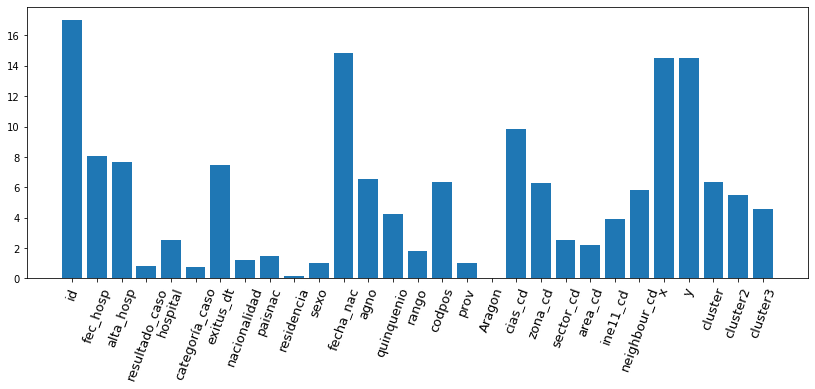

In [14]:
#Calculamos la entropía total de cada columna y la mostramos
totEnt = []
for a in data.columns:
    totEnt.append(pandas_entropy(data[a]))
    
print(totEnt)
plt.rcParams["figure.figsize"] = (14,5)
plt.xticks(fontsize=13, rotation=70)
plt.bar(data.columns,totEnt)
fig = plt.gcf()
fig.savefig('all_ent.png', bbox_inches = "tight")

In [10]:
#Realiza la query correspondiente a lista
def query(datal,lista):
    data2 = data[datal].groupby(lista,dropna=False).agg('count')
    keep = data.groupby(lista).filter(lambda x: len(x) > 4)[lista]
    selection = data.join(keep,how='inner',rsuffix='_kp')
    entr = all_entropy(lista,selection)
    return data2[data2<=4].sum(),entr

In [11]:
#Función para calcular la salida transformada de una lista
def transf(list2, list3):
    salida = []
    for combi in itertools.product(*list2):
        sublist = []
        newIne = False
        ok = True
        #print(combi)
        for i in combi:
            if i == None:
                ok = True
            elif i == "ine11_cd" and newIne == True:
                newIne = False
            elif i == "neighbour_cd":
                newIne = True
                sublist.append(i)
            else:
                sublist.append(i)
        salida.append(sublist)
    for combi in itertools.product(*list3):
        salida.append(list(combi))
    return salida

In [12]:
#Función que devuelve las dos listas que se usan en la consulta
def getList(ll):
    ll1 = ["id"]
    ll2 = []
    ll1.extend(ll)
    ll2.extend(ll)
    return ll2,ll1

In [22]:
#Función encargada de calcular todas las distribuciones y guardarlas. REQUIERE DE LA CARPETA gImg2, si no dará error
def getAllDist():
    path = '../gimg2/'
    for a in data.columns:
        data2 = data.groupby(a).size().sort_values().reset_index(name='count')
        data2.plot.bar(x=a, y='count',figsize = (50,20), rot=0)
        if data2.shape[0] > 10:
            plt.xticks(fontsize=0, rotation=0)
        else:
            value = 1000/data2.shape[0]
            if value > 140: value = 140
            plt.xticks(fontsize=value, rotation=0)
        plt.yticks(fontsize=100, rotation=0)
        fig = plt.gcf()
        p2 = path + a + '.png'
        fig.savefig(p2)
        print(a)
        plt.close()

In [13]:
#bucle principal que realiza los cálculos
salida = transf(list2,list3)
dicti = {}
s1 = []
s2 = []
best = data.size
bestEnt = 0
bestList = []
bestListEnt = []
magic = False
for combi in salida:
    if(magic == True): print(combi, end =" ")
    else: print(combi)
    if(magic == True): print("&", end =" ")
    lista,dataL = getList(combi)
    value,newEnt = query(dataL,lista)
    if(magic == True): print("num{", end ="")
    if(magic == True): print(newEnt, end ="")
    if(magic == True): print("}", end =" ")
    if(magic == True): print("&", end =" ")
    if(magic == False): print('descartados:', value[0])
    else: print(value[0], end =" ")
    if(magic == True): print("&", end =" ")
    if(magic == False): print('registros:', len(data) - value[0])
    else: print(len(data) - value[0], end =" ")
    if(magic == True): print("\\\ \hline")
    dicti[value[0]] = newEnt
    s1.append(value[0])
    s2.append(newEnt)
    if(value[0] < best):
        best = value[0]
        bestList.clear()
        bestList.append(lista)
    elif(value[0] == best):
        bestList.append(lista)
    if(bestEnt < newEnt):
        bestEnt = newEnt
        bestListEnt.clear()
        bestListEnt.append(lista)
    elif(bestEnt == newEnt):
        bestListEnt.append(lista)
print('Mayor entropía: ',bestEnt, end=", ")
print('combinación: ',bestListEnt)
print('Menor número de registros inválidos: ',best,end=", ")
print('combinación: ',bestList)


['sexo', 'fecha_nac', 'codpos']
Entropy 28.89
descartados: 140059.0
registros: 1189.0
['sexo', 'fecha_nac', 'prov']
Entropy 41.13
descartados: 125612.0
registros: 15636.0
['sexo', 'fecha_nac', 'Aragon']
Entropy 43.14
descartados: 109616.0
registros: 31632.0
['sexo', 'fecha_nac', 'cias_cd']
Entropy 28.69
descartados: 140162.0
registros: 1086.0
['sexo', 'fecha_nac', 'zona_cd']
Entropy 28.85
descartados: 140091.0
registros: 1157.0
['sexo', 'fecha_nac', 'sector_cd']
Entropy 34.43
descartados: 138453.0
registros: 2795.0
['sexo', 'fecha_nac', 'area_cd']
Entropy 35.34
descartados: 138246.0
registros: 3002.0
['sexo', 'fecha_nac', 'ine11_cd']
Entropy 38.45
descartados: 134149.0
registros: 7099.0
['sexo', 'fecha_nac', 'neighbour_cd']
Entropy 28.89
descartados: 140059.0
registros: 1189.0
['sexo', 'agno', 'codpos']
Entropy 42.60
descartados: 32534.0
registros: 108714.0
['sexo', 'agno', 'prov']
Entropy 38.62
descartados: 56.0
registros: 141192.0
['sexo', 'agno', 'Aragon']
Entropy 37.64
descartados: